<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework4Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [2]:
# load the dataset
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Perform N independent trainings of SVM classifiers using PCA-transformed data
K = 10
results = []
for n in range(1, K+1):
    # PCA feature extraction
    pca = PCA(n_components=n, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM classifier
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_pca, y_train)

    # Evaluate performance on test set
    y_pred = svm.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append((n, acc, prec, recall))

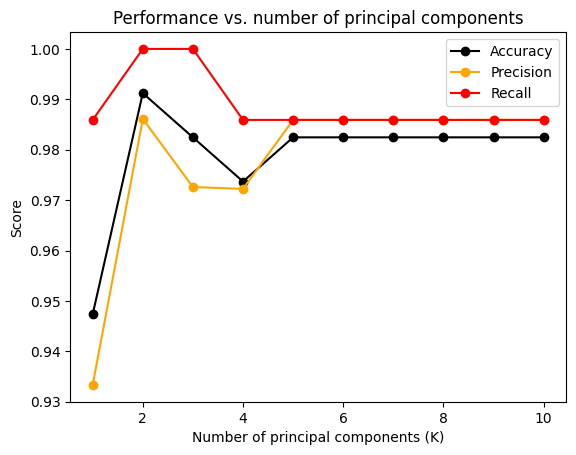

In [6]:
# Plot classification accuracy, precision, and recall over different number of Ks
results_df = pd.DataFrame(results, columns=['n', 'accuracy', 'precision', 'recall'])
plt.plot('n', 'accuracy', data=results_df, marker='o', color='black', label='Accuracy')
plt.plot('n', 'precision', data=results_df, marker='o', color='orange', label='Precision')
plt.plot('n', 'recall', data=results_df, marker='o', color='red', label='Recall')
plt.legend()
plt.xlabel('Number of principal components (K)')
plt.ylabel('Score')
plt.title('Performance vs. number of principal components')
plt.show()

In [7]:
# Explore different kernel tricks
kernel_results = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    # PCA feature extraction
    pca = PCA(n_components=2, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM classifier with different kernel
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_pca, y_train)

    # Evaluate performance on test set
    y_pred = svm.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    kernel_results.append((kernel, acc))

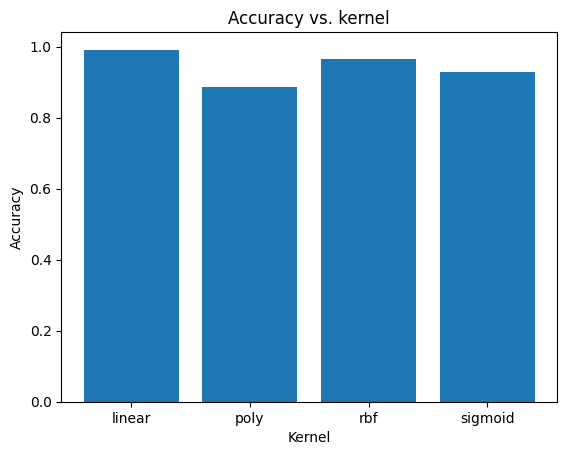

In [8]:
# Plot accuracy for different kernels
kernel_results_df = pd.DataFrame(kernel_results, columns=['Kernel', 'Accuracy'])
plt.bar('Kernel', 'Accuracy', data=kernel_results_df)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. kernel')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Define a pipeline that includes PCA and SVM
pipe = Pipeline([
    ('pca', PCA()),
    ('svm', SVC(kernel='rbf'))
])

# Define a grid of parameters to search over
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10]
}

# Perform a grid search over the parameter grid
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best parameters:  {'pca__n_components': 10, 'svm__C': 1, 'svm__gamma': 0.1}
Best score:  0.9714285714285715
